## 1. 월별 제주 여행 블로그 감성 분석
> 감성 사전을 이용한 비지도 학습기반 감성분석 (규칙/어휘 기반)

> 데이터 수집 기간: 2020년 1월 - 2021년 12월

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ddmport seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

plt.rc('font', family='Apple SD Gothic Neo')

df_2001 = pd.read_csv('./data/20-01.csv')
df_2002 = pd.read_csv('./data/20-02.csv')
df_2003 = pd.read_csv('./data/20-03.csv')
df_2004 = pd.read_csv('./data/20-04.csv')
df_2005 = pd.read_csv('./data/20-05.csv')
df_2006 = pd.read_csv('./data/20-06.csv')
df_2007 = pd.read_csv('./data/20-07.csv')
df_2008 = pd.read_csv('./data/20-08.csv')
df_2009 = pd.read_csv('./data/20-09.csv')
df_2010 = pd.read_csv('./data/20-10.csv')
df_2011 = pd.read_csv('./data/20-11.csv')
df_2012 = pd.read_csv('./data/20-12.csv')
df_2101 = pd.read_csv('./data/21-01.csv')
df_2102 = pd.read_csv('./data/21-02.csv')
df_2103 = pd.read_csv('./data/21-03.csv')
df_2104 = pd.read_csv('./data/21-04.csv')
df_2105 = pd.read_csv('./data/21-05.csv')
df_2106 = pd.read_csv('./data/21-06.csv')
df_2107 = pd.read_csv('./data/21-07.csv')
df_2108 = pd.read_csv('./data/21-08.csv')
df_2109 = pd.read_csv('./data/21-09.csv')
df_2110 = pd.read_csv('./data/21-10.csv')
df_2111 = pd.read_csv('./data/21-11.csv')
df_2112 = pd.read_csv('./data/21-12.csv')

In [2]:
# null 값 처리
df_2001 = df_2001.dropna().reset_index(drop=True)
df_2002 = df_2002.dropna().reset_index(drop=True)
df_2003 = df_2003.dropna().reset_index(drop=True)
df_2004 = df_2004.dropna().reset_index(drop=True)
df_2005 = df_2005.dropna().reset_index(drop=True)
df_2006 = df_2006.dropna().reset_index(drop=True)
df_2007 = df_2007.dropna().reset_index(drop=True)
df_2008 = df_2008.dropna().reset_index(drop=True)
df_2009 = df_2009.dropna().reset_index(drop=True)
df_2010 = df_2010.dropna().reset_index(drop=True)
df_2011 = df_2011.dropna().reset_index(drop=True)
df_2012 = df_2012.dropna().reset_index(drop=True)
df_2101 = df_2101.dropna().reset_index(drop=True)
df_2102 = df_2102.dropna().reset_index(drop=True)
df_2103 = df_2103.dropna().reset_index(drop=True)
df_2104 = df_2104.dropna().reset_index(drop=True)
df_2105 = df_2105.dropna().reset_index(drop=True)
df_2106 = df_2106.dropna().reset_index(drop=True)
df_2107 = df_2107.dropna().reset_index(drop=True)
df_2108 = df_2108.dropna().reset_index(drop=True)
df_2109 = df_2109.dropna().reset_index(drop=True)
df_2110 = df_2110.dropna().reset_index(drop=True)
df_2111 = df_2111.dropna().reset_index(drop=True)
df_2112 = df_2112.dropna().reset_index(drop=True)

- **불용어 제거**
    - RANKS NL에 제공해주는 [한국어 불용어](https://www.ranks.nl/stopwords/korean) 활용

In [3]:
# 데이터 전처리

from konlpy.tag import Mecab

mecab = Mecab()

# 불용어
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()

def data_preprocessing(df):
    text_prep = df['내용'].str.replace("[^ㅏ-ㅣ가-힣. ]", " ") # 한글을 제외한 문자 제거
    df['text_prep'] = text_prep
    
    text_corpus = [mecab.nouns(corpus) for corpus in text_prep]

    # 1글자 & 불용어 제거
    tokenized_text = []
    for token_text in text_corpus:
        token_text = [word for word in token_text if (len(word) > 1) & (word not in stopwords)]
        tokenized_text.append(token_text)

        
    df['tokenized_text'] = tokenized_text
    
    return df

df_2001 = data_preprocessing(df_2001)
df_2002 = data_preprocessing(df_2002)
df_2003 = data_preprocessing(df_2003)
df_2004 = data_preprocessing(df_2004)
df_2005 = data_preprocessing(df_2005)
df_2006 = data_preprocessing(df_2006)
df_2007 = data_preprocessing(df_2007)
df_2008 = data_preprocessing(df_2008)
df_2009 = data_preprocessing(df_2009)
df_2010 = data_preprocessing(df_2010)
df_2011 = data_preprocessing(df_2011)
df_2012 = data_preprocessing(df_2012)
df_2101 = data_preprocessing(df_2101)
df_2102 = data_preprocessing(df_2102)
df_2103 = data_preprocessing(df_2103)
df_2104 = data_preprocessing(df_2104)
df_2105 = data_preprocessing(df_2105)
df_2106 = data_preprocessing(df_2106)
df_2107 = data_preprocessing(df_2107)
df_2108 = data_preprocessing(df_2108)
df_2109 = data_preprocessing(df_2109)
df_2110 = data_preprocessing(df_2110)
df_2111 = data_preprocessing(df_2111)
df_2112 = data_preprocessing(df_2112)

/var/folders/fw/9gdbjd851zl94gbm7f96rmcm0000gn/T/ipykernel_990/1344595359.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  text_prep = df['내용'].str.replace("[^ㅏ-ㅣ가-힣. ]", " ") # 한글을 제외한 문자 제거


In [4]:
df_2001.tail()

,날짜,관광 명소,제목,내용,url,글쓴이,text_prep,tokenized_text
2651,2020. 1. 25. 18:32,제주 여행,"제주여행(1) 다랑쉬오름, 월정리해변, 춘식당, 소낭게스트하우스, 제주에서의 런닝.","단조로운 일상이 무료하게 느껴질 때, 충동적으로 제주도행 비행기를 예매했다. 지난...",https://blog.naver.com/daily-hj/221784948257,진이,단조로운 일상이 무료하게 느껴질 때 충동적으로 제주도행 비행기를 예매했다. 지난...,"[일상, 무료, 충동, 제주, 도행, 비행기, 예매, 겨울, 제주도, 혼자, 여행,..."
2652,2020. 1. 22. 21:48,제주 여행,"제주여행 :: 우도 배시간 확인, 전기차 타고 우도 여행하기",소섬이라 불리우는 섬\n가장 제주도스러운 섬\n제주안의 또다른 제주\n#우도\n성산...,https://blog.naver.com/bluelingo/221782044004,깜장콩,소섬이라 불리우는 섬 가장 제주도스러운 섬 제주안의 또다른 제주 우도 성산항에서 ...,"[소섬, 주도, 주안, 제주, 우도, 성산, 우도, 진항, 시간표, 확인, 전기, ..."
2653,2020. 1. 26. 23:41,제주 여행,[여행]1월 제주 여행 제주살이 제주도 여행 제주도 가볼만한 곳 제주도 명소 한림공원,#제주한림공원고등학교 때 수학여행으로 왔던 오래된 기억 ㅎㅎㅎ\n오랜만에 제주한림공...,https://blog.naver.com/essder84/221785982087,Rhema,제주한림공원고등학교 때 수학여행으로 왔던 오래된 기억 오랜만에 제주한림공원...,"[제주, 한림공원, 고등학교, 수학여행, 오래, 기억, 오랜만, 제주, 한림공원, ..."
2654,2020. 1. 23. 18:20,제주 여행,[ 제주여행 2박 3일 마지막 날] 2018년 여름휴가 마지막 날은 소인국 테마파크...,● 제주 3일차 일정 ●\n기상 - 히든 클리프 호텔&네이쳐 조식 - 추사관 - 소...,https://blog.naver.com/thsek2082/221783038940,도야랑 영이랑,제주 일차 일정 기상 히든 클리프 호텔 네이쳐 조식 추사관 소인...,"[제주, 일차, 일정, 기상, 히든, 클리프, 호텔, 조식, 추사, 소인국, 테마파..."
2655,2020. 1. 18. 17:51,제주 여행,[국내/제주여행] 제주 서귀포 가성비 좋은 숙소 '헤이서귀포' (다소 주관적일 수 있음),블로그를 뒤적거려보니 숙소 리뷰는 처음인듯...?\n그런김에 이번에 가족여행갔다오면...,https://blog.naver.com/abralsj/221776700732,털아저씨,블로그를 뒤적거려보니 숙소 리뷰는 처음인듯... 그런김에 이번에 가족여행갔다오면서...,"[블로그, 숙소, 리뷰, 처음, 이번, 가족, 여행, 숙소, 리뷰, 예약, 성수기,..."


**KNU 한국어 감성사전**
- 군산대학교 소프트웨어융합공학과에서 개발
- word : 감정 단어
- polarity : 감정의 강도
- KNU 한국어 감성사전 출처: https://github.com/park1200656/KnuSentiLex

In [5]:
import json

# 한국어 감성사전 불러오기
with open('data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
    sent_data = json.load(f)

In [40]:
# 감성사전에 대응하는 corpus와 감성 점수 추출

def find_sents(x):
    for sents in sent_data:
        # method: 완전히 일치 (not 'in')
        if x == (sents['word'] or sents['word_root']):
            return x, sents['polarity']

def sent_analysis(df, num):
    df['sent_words'] = ''
    for i, corpus in enumerate(df['tokenized_text']):
        t = list(map(find_sents, corpus))
        t = [i for i in t if i not in {None}]
        df.loc[i]['sent_words'] = t
        
    # pickel 저장
    with open('./data/'+num+'_sent_words.pickle', 'wb') as f:
        pickle.dump(df['sent_words'].values, f, pickle.HIGHEST_PROTOCOL)

    return df


In [41]:
df_2002 = sent_analysis(df_2002, '2002')
df_2003 = sent_analysis(df_2003, '2003')
df_2004 = sent_analysis(df_2004, '2004')
df_2005 = sent_analysis(df_2005, '2005')
df_2006 = sent_analysis(df_2006, '2006')
df_2007 = sent_analysis(df_2007, '2007')
df_2008 = sent_analysis(df_2008, '2008')
df_2009 = sent_analysis(df_2009, '2009')
df_2010 = sent_analysis(df_2010, '2010')
df_2011 = sent_analysis(df_2011, '2011')
df_2012 = sent_analysis(df_2012, '2012')
df_2101 = sent_analysis(df_2101, '2101')
df_2102 = sent_analysis(df_2102, '2102')
df_2103 = sent_analysis(df_2103, '2103')
df_2104 = sent_analysis(df_2104, '2104')
df_2105 = sent_analysis(df_2105, '2105')
df_2106 = sent_analysis(df_2106, '2106')
df_2107 = sent_analysis(df_2107, '2107')
df_2108 = sent_analysis(df_2108, '2108')
df_2109 = sent_analysis(df_2109, '2109')
df_2110 = sent_analysis(df_2110, '2110')
df_2111 = sent_analysis(df_2111, '2111')
df_2112 = sent_analysis(df_2112, '2112')

In [66]:
# 'pos', 'neg' 만들어서 count 세기 => 월별 'pos', 'neg' 비율 확인
# https://velog.io/@yuhayung7296/R.-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EB%A7%88%EC%9D%B4%EB%8B%9D-%EA%B0%90%EC%A0%95-%EB%B6%84%EC%84%9D

nums = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012',
       '2101','2102','2103','2104','2105','2106','2107','2108','2109','2110','2111','2112']

sent_max = 0
max_year = 0
for num in nums:
    # pickle 불러오기
    with open('./data/'+num+'_sent_words.pickle', 'rb') as f:
        globals()['sents_{}'.format(num)] = pickle.load(f)

    if len(globals()['sents_{}'.format(num)]) > sent_max:
        sent_max = len(globals()['sents_{}'.format(num)])
        max_year = num
        
print(max_year, sent_max)


2011 4007


In [91]:
max_cnt = 0

for num in nums:
    cnt = 0 
    for i in globals()['sents_{}'.format(num)]:
        cnt += len(i)
    if cnt > max_cnt:
        max_cnt = cnt
        
print(max_cnt)

sent_by_months_df = pd.DataFrame(index=range(0, max_cnt), columns=nums)

23609


In [92]:
def check_ratio_by_month(df, nums):
    
    for num in nums:
        i = 0
        for sents_set in globals()['sents_{}'.format(num)]:
            for sents in sents_set:
                if int(sents[1]) > 0:
                    df.loc[i][num] = 'pos'
                elif int(sents[1]) == 0:
                    df.loc[i][num] = 'neu'
                else:
                    df.loc[i][num] = 'neg'
                i += 1
    return df

sent_by_months_df = check_ratio_by_month(sent_by_months_df, nums)

In [96]:
sent_by_months_df.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112
0,neg,pos,neg,neg,pos,pos,pos,neg,pos,neg,...,pos,pos,pos,neg,neg,pos,pos,pos,pos,pos
1,neg,pos,neg,neg,pos,pos,pos,neg,pos,pos,...,pos,pos,neg,pos,pos,pos,pos,pos,neg,pos
2,pos,pos,pos,neg,pos,pos,pos,neg,pos,pos,...,pos,pos,pos,pos,pos,neg,pos,pos,neg,neg
3,neg,pos,pos,pos,pos,pos,pos,pos,pos,pos,...,pos,neg,neg,neg,pos,neg,pos,pos,pos,neg
4,pos,pos,pos,pos,pos,neg,pos,pos,pos,pos,...,pos,pos,pos,pos,pos,pos,pos,pos,pos,pos


In [162]:
s = pd.Series(sent_by_months_df['2001'].value_counts() / len(sent_by_months_df['2001'][sent_by_months_df['2001'].notnull()])) * 100
ss = pd.Series(sent_by_months_df['2002'].value_counts() / len(sent_by_months_df['2002'][sent_by_months_df['2002'].notnull()])) * 100

In [167]:
sent_ratio_df = pd.concat([pd.Series(sent_by_months_df['2001'].value_counts() / len(sent_by_months_df['2001'][sent_by_months_df['2001'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2002'].value_counts() / len(sent_by_months_df['2002'][sent_by_months_df['2002'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2003'].value_counts() / len(sent_by_months_df['2003'][sent_by_months_df['2003'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2004'].value_counts() / len(sent_by_months_df['2004'][sent_by_months_df['2004'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2005'].value_counts() / len(sent_by_months_df['2005'][sent_by_months_df['2005'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2006'].value_counts() / len(sent_by_months_df['2006'][sent_by_months_df['2006'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2007'].value_counts() / len(sent_by_months_df['2007'][sent_by_months_df['2007'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2008'].value_counts() / len(sent_by_months_df['2008'][sent_by_months_df['2008'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2009'].value_counts() / len(sent_by_months_df['2009'][sent_by_months_df['2009'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2010'].value_counts() / len(sent_by_months_df['2010'][sent_by_months_df['2010'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2011'].value_counts() / len(sent_by_months_df['2011'][sent_by_months_df['2011'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2012'].value_counts() / len(sent_by_months_df['2012'][sent_by_months_df['2012'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2101'].value_counts() / len(sent_by_months_df['2101'][sent_by_months_df['2101'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2102'].value_counts() / len(sent_by_months_df['2101'][sent_by_months_df['2102'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2103'].value_counts() / len(sent_by_months_df['2101'][sent_by_months_df['2103'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2104'].value_counts() / len(sent_by_months_df['2101'][sent_by_months_df['2104'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2105'].value_counts() / len(sent_by_months_df['2101'][sent_by_months_df['2105'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2106'].value_counts() / len(sent_by_months_df['2101'][sent_by_months_df['2106'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2107'].value_counts() / len(sent_by_months_df['2101'][sent_by_months_df['2107'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2108'].value_counts() / len(sent_by_months_df['2101'][sent_by_months_df['2108'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2109'].value_counts() / len(sent_by_months_df['2101'][sent_by_months_df['2109'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2110'].value_counts() / len(sent_by_months_df['2101'][sent_by_months_df['2110'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2111'].value_counts() / len(sent_by_months_df['2101'][sent_by_months_df['2111'].notnull()])) * 100,
                          pd.Series(sent_by_months_df['2112'].value_counts() / len(sent_by_months_df['2101'][sent_by_months_df['2112'].notnull()])) * 100,], axis=1)

sent_ratio_df


,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112
pos,75.787822,73.966357,73.616047,78.355856,78.028855,77.873095,77.043429,77.305446,76.862883,77.231490,...,77.494890,77.919438,77.649623,77.861555,78.910476,77.577805,78.656543,77.614071,78.452487,78.043836
neg,22.642812,24.194309,24.844034,20.101351,20.319833,20.737327,21.600607,21.141745,21.250876,21.158911,...,20.696703,20.441357,20.897285,20.822151,19.720720,20.827334,19.852574,20.895437,20.104352,20.361644
neu,1.569366,1.839333,1.539919,1.542793,1.651312,1.389578,1.355964,1.552809,1.886242,1.609599,...,1.808407,1.639205,1.453092,1.316294,1.368805,1.594861,1.490883,1.490492,1.443162,1.594521


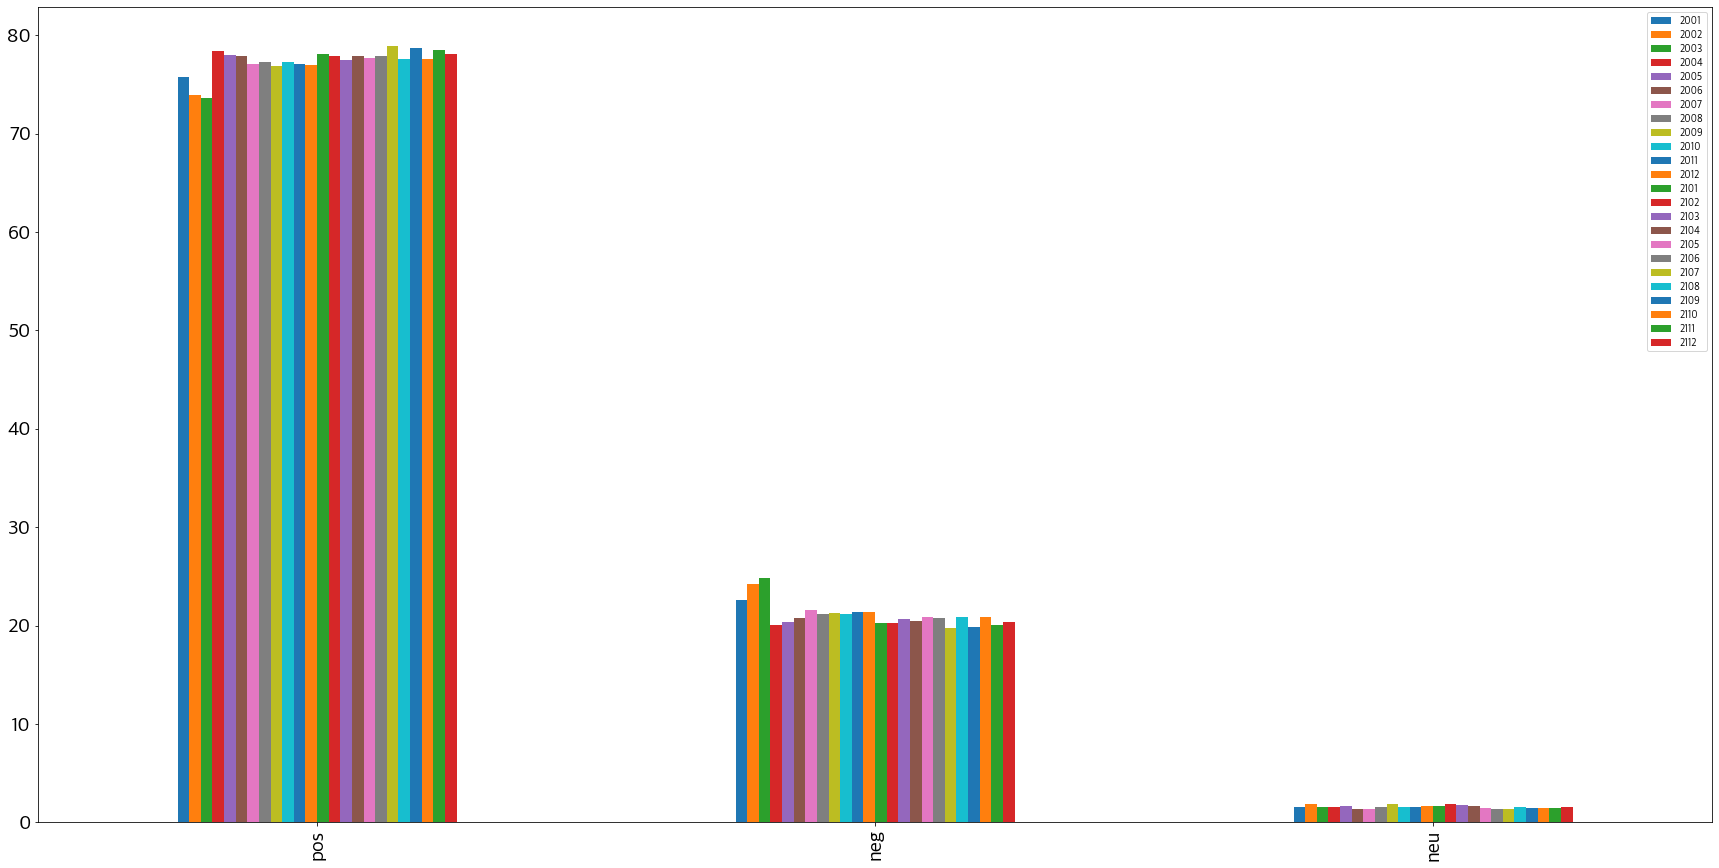

In [175]:
sent_ratio_df.plot(kind='bar', figsize=(30,15), fontsize=20)
plt.show()

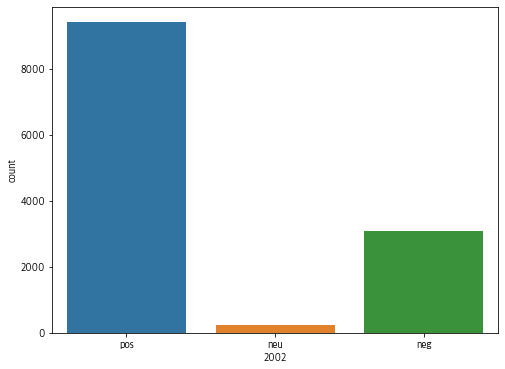

In [178]:
plt.figure(figsize=(8,6))
sns.countplot(x='2002', data=sent_by_months_df, order=['pos','neu','neg'], )
plt.show()